# Mercari Price Prediction(Kaggle)

In [1]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pandas as pd

In [41]:
mercari=pd.read_csv('data/Mercari Price Suggestion Challenge.tsv',sep='\t')

In [42]:
mercari.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [43]:
mercari.shape

(1482535, 8)

# 전처리

category_name의 결측치 6327개  
brand_name의 결측치 632682개  
item_description의 결측치 4개

In [44]:
mercari.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [45]:
import seaborn as sns

11.393232000122524

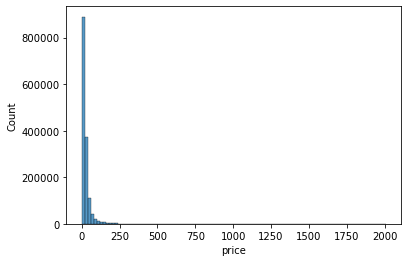

In [46]:
sns.histplot(mercari['price'],bins=100)
mercari['price'].skew()
# 왼쪽으로 치우친 분포
# 왜도 11.39

In [47]:
import numpy as np

In [48]:
price_l=np.log1p(mercari['price'])

In [49]:
mercari['price']=price_l

0.6594232018807694

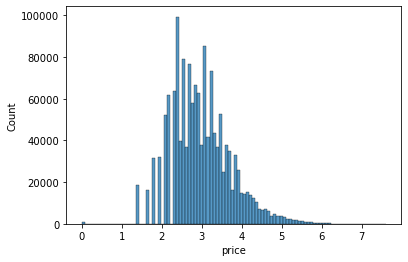

In [50]:
# 왜도 0.66으로 감소
sns.histplot(mercari['price'],bins=100)
mercari['price'].skew()

In [53]:
mercari['item_condition_id'].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

In [58]:
mercari['brand_name'].value_counts()

PINK                    54088
Nike                    54043
Victoria's Secret       48036
LuLaRoe                 31024
Apple                   17322
                        ...  
The Learning Journey        1
Pampers Baby Fresh          1
Huggies One & Done          1
Classic Media               1
Kids Only                   1
Name: brand_name, Length: 4809, dtype: int64

In [63]:
mercari['shipping'].value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

item_description의 결측치는 4개였지만 No description yet도 결측치로 간주하면 82489개를 더해 **82493개**

In [97]:
mercari[mercari['item_description'].isnull()]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cate_l,cate_m,cate_s
511535,511535,Shoes for Michelle,4,Kids/Girls 0-24 Mos/Shoes,NaN,2.302585,0,NaN,Kids,Girls 0-24 Mos,Shoes
861230,861230,Lipgloss,4,Beauty/Makeup/Lips,NaN,3.912023,0,NaN,Beauty,Makeup,Lips
1224924,1224924,Disney Minnie Head band,3,Women/Women's Accessories/Hair Accessories,Disney,2.302585,0,NaN,Women,Women's Accessories,Hair Accessories
1264242,1264242,For Bianca,3,Women/Women's Accessories/Scarves & Wraps,NaN,2.397895,1,NaN,Women,Women's Accessories,Scarves & Wraps


In [66]:
mercari[mercari['item_description']=='No description yet']

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,2.397895,1,No description yet
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,1.609438,1,No description yet
31,31,"New Lularoe OS leggings, stars",1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,3.931826,1,No description yet
90,90,Jewel holder,2,Home/Storage & Organization/Jewelry Boxes & Or...,Target,2.079442,1,No description yet
117,117,Eyeko liquid eyeliner,1,Beauty/Makeup/Eyes,NaN,1.791759,1,No description yet
...,...,...,...,...,...,...,...,...
1482430,1482430,Nike Jordan's 5c,3,Kids/Girls 2T-5T/Shoes,Nike,2.708050,0,No description yet
1482447,1482447,Wet n Wild Eyelashes,2,Beauty/Makeup/Eyes,Wet n Wild,1.386294,1,No description yet
1482470,1482470,Adidas ultra boost,2,Men/Shoes/Athletic,Adidas,2.302585,0,No description yet
1482496,1482496,Benefit they're real mascara,1,Beauty/Makeup/Eyes,Benefit,2.197225,1,No description yet


Category_name은 대/중/소로 이루어졌으므로 분리해서 각각 변수화

In [77]:
def cate(var):
    try:
        return var.split('/')
    except:
        return ['Other_Null','Other_Null','Other_Null']

In [85]:
cate(mercari['category_name'][0])

['Men', 'Tops', 'T-shirts']

In [82]:
mercari['cate_l'],mercari['cate_m'],mercari['cate_s']=zip(*mercari['category_name'].apply(lambda x: cate(x)))

In [83]:
mercari.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cate_l,cate_m,cate_s
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,2.397895,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,3.970292,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,2.397895,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,3.583519,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,3.806662,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


대분류는 Women, 중분류는 Athletic Apparel, 소분류는 Pants, Tights, Leggings가 가장 많음

In [96]:
print('대분류\n',mercari['cate_l'].value_counts())
print('\n중분류\n',mercari['cate_m'].value_counts())
print('\n소분류\n',mercari['cate_s'].value_counts())

대분류
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cate_l, dtype: int64

중분류
 Athletic Apparel        134383
Makeup                  124624
Tops & Blouses          106960
Shoes                   100452
Jewelry                  61763
                         ...  
Candles                     64
Ceramics and Pottery        57
Dolls and Miniatures        49
Books and Zines             46
Quilts                      31
Name: cate_m, Length: 114, dtype: int64

소분류
 Pants, Tights, Leggings       60177
Other                         50224
Face                          50171
T-Shirts                      46380
Shoes                         32168
                              ..

In [98]:
mercari['brand_name']=mercari['brand_name'].fillna('Other_Null')
mercari['category_name']=mercari['category_name'].fillna('Other_Null')
mercari['item_description']=mercari['item_description'].fillna('No description yet')

In [99]:
cnt=CountVectorizer()
tf=TfidfVectorizer(max_features=50000,ngram_range=(1,3),stop_words='english')

In [100]:
name_cnt=cnt.fit_transform(mercari['name'])
des_tf=tf.fit_transform(mercari['item_description'])

문자를 수치화 인코딩

In [106]:
from sklearn.preprocessing import LabelBinarizer

In [109]:
def label(var):
    lb=LabelBinarizer(sparse_output=True)
    
    return lb.fit_transform(var)

In [110]:
brand_name=label(mercari['brand_name'])
cate_l=label(mercari['cate_l'])
cate_m=label(mercari['cate_m'])
cate_s=label(mercari['cate_s'])

In [124]:
item_cond=label(mercari['item_condition_id'])
shpping=label(mercari['shipping'])

결합할 변수 : name_cnt, des_ft, item_condition_id, shipping, brand_name, cate_l, cate_m, cate_s

In [125]:
var=(name_cnt, des_tf, brand_name, item_cond, shpping, cate_l, cate_m, cate_s)

In [126]:
from scipy.sparse import hstack 
feat=hstack(var).tocsr()